<a href="https://colab.research.google.com/github/Bast1-py/Experience-Developing-Projects/blob/main/Sentiment_Analysis_of_Product_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re, os

In [ ]:
# Import Library for Machine Learning Algorithms to Modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Import Library for Deep Learning Algorithms to Modeling
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, Flatten, Embedding, Dropout, Bidirectional, SpatialDropout1D

In [ ]:
# Import Library for topic modeling
import matplotlib.colors as mcolors
import gensim, spacy, nltk
import gensim.corpora as corpora
from nltk.tokenize import word_tokenize
# import pyLDavis.gensim
# from gensim.utils import lemmatize
from gensim.utils import simple_preprocess
from nltk.stem.wordnet import WordNetLemmatizer
from pprint import pprint
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

In [ ]:
# read data
df = pd.read_csv('/content/clean_train.csv')
df

,content,content_stem,score,target
0,For god sake yr welcome gift T&C isnt stated c...,god sake yr welcom gift c isnt state clearli o...,2,1
1,Shopee has a wild variety of products however ...,wild varieti product howev buy certain stuff w...,3,1
2,Cheap and very fast...I love order here..,cheap fast love order,5,0
3,Overall no complains it's good,overal complain good,5,0
4,Reliable and cheap👍👍👍,reliabl cheap,5,0
...,...,...,...,...
3473,"Good. But sometime keep hang, app auto restart...",good sometim keep hang auto restart pleas fix ...,5,0
3474,A good place to shop with or without budget. C...,good place shop without budget choos wise love...,5,0
3475,This app is not opening with samsung s10 plus,open samsung plu,1,1
3476,Great. Thumb up,great thumb,5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       3478 non-null   object
 1   content_stem  3478 non-null   object
 2   score         3478 non-null   int64 
 3   target        3478 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 108.8+ KB


In [ ]:
df['target'].value_counts(normalize=True)

target
0    0.609833
1    0.390167
Name: proportion, dtype: float64

In [ ]:
X = df['content_stem']
y = df['target']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape

(2782,)

In [ ]:
X_val.shape

(696,)

In [ ]:
y_train.value_counts(normalize=True)

target
0    0.609993
1    0.390007
Name: proportion, dtype: float64

In [ ]:
y_val.value_counts(normalize=True)

target
0    0.609195
1    0.390805
Name: proportion, dtype: float64

In [ ]:
def cmat(actual_y, predictions, dataset):
  # membuat report kalsifikasi
  print('Classification Report For', dataset)
  print(classification_report(actual_y, predictions))
  print('')

  # membuat konfusion matriks
  cm = confusion_matrix(actual_y, predictions)
  cm_df = pd.DataFrame(cm, columns=['Predicted Positive Review', 'Predicted Negative Review'], index=['Actual Positive Review', 'Actual Negative Review'])
  print('Confusion Matrix For', dataset)
  print(cm_df)

**Machine Learning Algorithms**

**Count Vectorizer & Logistic Regression**

In [ ]:
# membuat sebuah pipeline dengan menghitung vectorizer dan model logistic regression
pipe_cvec_lr = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('lr', LogisticRegression(random_state=42))
])

# melakukan hyperparameters
pipe_cvec_lr_params = {
    'cvec__max_features': [300],
    'cvec__min_df': [2,3],
    'cvec__max_df': [.9,.95],
    'lr__penalty': ['l2'],
    'lr__C': [.01,.1]
}

# melakukan GridSearchCV
gs_cvec_lr = GridSearchCV(pipe_cvec_lr,     # objek untuk optimise
                          param_grid = pipe_cvec_lr_params,   # hyperparameters untuk tuning
                          cv=10)    # cross validation

gs_cvec_lr.fit(X_train, y_train) # fit model of traning data

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [300], 'cvec__min_df': [2, 3],
                         'lr__C': [0.01, 0.1], 'lr__penalty': ['l2']})

In [ ]:
cvec_lr_pred = gs_cvec_lr.predict(X_val) # membuat prediksi
print('Best Parameters: ', gs_cvec_lr.best_params_)
print('Best Cross Validation Score: ', gs_cvec_lr.best_score_)
print('Traning Score: ', gs_cvec_lr.score(X_train, y_train))
print('Validation Score: ', gs_cvec_lr.score(X_val, y_val))
print('')
cmat(y_val, cvec_lr_pred, 'Validation Set')

Best Parameters:  {'cvec__max_df': 0.9, 'cvec__max_features': 300, 'cvec__min_df': 2, 'lr__C': 0.1, 'lr__penalty': 'l2'}
Best Cross Validation Score:  0.8587362368169981
Traning Score:  0.8820992092020129
Validation Score:  0.860632183908046

Classification Report For Validation Set
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       424
           1       0.91      0.71      0.80       272

    accuracy                           0.86       696
   macro avg       0.87      0.83      0.85       696
weighted avg       0.87      0.86      0.86       696


Confusion Matrix For Validation Set
                        Predicted Positive Review  Predicted Negative Review
Actual Positive Review                        405                         19
Actual Negative Review                         78                        194


**Count Vectorizer & Naive Bayes**

In [ ]:
# membuat sebuah pipeline dengan Count vectorizer dan model Naive Bayes
pipe_cvec_nb = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])


# melakukan hyperparameters
pipe_cvec_nb_params = {
    'cvec__max_features':[500],
    'cvec__min_df':[2,3],
    'cvec__max_df':[.9,.95],
}


# melakukan GridSearchCV
gs_cvec_nb = GridSearchCV(pipe_cvec_nb,   # objek untuk optimise
                          param_grid = pipe_cvec_nb_params,   # hyperparameters untuk tuning
                          cv=10)    # cross validation



gs_cvec_nb.fit(X_train, y_train)   # fit model of traning data

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [500], 'cvec__min_df': [2, 3]})

In [ ]:
# membuat prediksi data traning
cvec_nb_pred = gs_cvec_nb.predict(X_val)
print('Best Parameters: ', gs_cvec_nb.best_params_)
print('Best Cross Valdiation Score: ', gs_cvec_nb.best_score_)
print('Traning Score: ', gs_cvec_nb.score(X_train, y_train))
print('Validation Score: ', gs_cvec_nb.score(X_val, y_val))
print('')
cmat(y_val, cvec_nb_pred, 'Validation Set')

Best Parameters:  {'cvec__max_df': 0.9, 'cvec__max_features': 500, 'cvec__min_df': 2}
Best Cross Valdiation Score:  0.8856914468425259
Traning Score:  0.8979151689432063
Validation Score:  0.8979885057471264

Classification Report For Validation Set
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       424
           1       0.90      0.83      0.86       272

    accuracy                           0.90       696
   macro avg       0.90      0.89      0.89       696
weighted avg       0.90      0.90      0.90       696


Confusion Matrix For Validation Set
                        Predicted Positive Review  Predicted Negative Review
Actual Positive Review                        399                         25
Actual Negative Review                         46                        226


**Count Vectorizer & SVC**

In [ ]:
# membuat sebuah pipeline dengan Count vectorizer dan model SVC
pipe_cvec_svc = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('svc', SVC(random_state=42))
])


# melakukan hyperparameters
pipe_cvec_svc_params = {
    'cvec__max_features': [300],
    'cvec__min_df':[2,3],
    'cvec__max_df':[.9,.95],
    'svc__kernel': ['linear'],
    'svc__C':[.1]
}



# melakukan GridSearchCV
gs_cvec_svc = GridSearchCV(pipe_cvec_svc,     # objek untuk optimise
                           param_grid = pipe_cvec_svc_params,   # hyperparameters untuk tuning
                           cv=10)     # cross validation


gs_cvec_svc.fit(X_train, y_train)     # fit model of traning data

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('svc', SVC(random_state=42))]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [300], 'cvec__min_df': [2, 3],
                         'svc__C': [0.1], 'svc__kernel': ['linear']})

In [ ]:
# membuat prediksi data traning
cvec_svc_pred = gs_cvec_svc.predict(X_val)
print('Best Parameters: ', gs_cvec_svc.best_params_)
print('Best Cross Validation Score: ', gs_cvec_svc.best_score_)
print('Traning Score: ', gs_cvec_svc.score(X_train, y_train))
print('Validation Score: ', gs_cvec_svc.score(X_val, y_val))
print('')
cmat(y_val, cvec_svc_pred, 'Validation Se')

Best Parameters:  {'cvec__max_df': 0.9, 'cvec__max_features': 300, 'cvec__min_df': 2, 'svc__C': 0.1, 'svc__kernel': 'linear'}
Best Cross Validation Score:  0.8734689667620742
Traning Score:  0.9000718907260963
Validation Score:  0.8721264367816092

Classification Report For Validation Se
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       424
           1       0.91      0.75      0.82       272

    accuracy                           0.87       696
   macro avg       0.88      0.85      0.86       696
weighted avg       0.88      0.87      0.87       696


Confusion Matrix For Validation Se
                        Predicted Positive Review  Predicted Negative Review
Actual Positive Review                        403                         21
Actual Negative Review                         68                        204


**TF-IDF & Logistic Regression**

In [ ]:
# membuat sebuah pipeline dengan TF-IDF vectorizer dan model logistic regression
pipe_tvec_lr = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english')),
    ('lr', LogisticRegression(random_state=42))
])


# melakukan hyperparameters
pipe_tvec_lr_params = {
    'tvec__max_features':[300],
    'tvec__min_df':[2,3],
    'tvec__max_df':[.9,.95],
    'lr__penalty':['l2'],
    'lr__C':[.1,1]
}



# melakukan GridSearchCV
gs_tvec_lr = GridSearchCV(pipe_tvec_lr,   # objek untuk optimise
                          param_grid = pipe_tvec_lr_params,     # hyperparameters untuk tuning
                          cv=10)      # cross validation


gs_tvec_lr.fit(X_train, y_train) # fit model of traning data

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             param_grid={'lr__C': [0.1, 1], 'lr__penalty': ['l2'],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [300], 'tvec__min_df': [2, 3]})

In [ ]:
# membuat prediksi data traning
tvec_lr_pred = gs_tvec_lr.predict(X_val)
print('Best Parameters: ', gs_tvec_lr.best_params_)
print('Best Cross Validation Score: ', gs_tvec_lr.best_score_)
print('Traning Score: ', gs_tvec_lr.score(X_train, y_train))
print('Validation Score: ', gs_tvec_lr.score(X_val, y_val))
cmat(y_val, tvec_lr_pred, 'Validation Set')

Best Parameters:  {'lr__C': 1, 'lr__penalty': 'l2', 'tvec__max_df': 0.9, 'tvec__max_features': 300, 'tvec__min_df': 2}
Best Cross Validation Score:  0.8767050875428689
Traning Score:  0.905823148813803
Validation Score:  0.8922413793103449
Classification Report For Validation Set
              precision    recall  f1-score   support

           0       0.89      0.95      0.91       424
           1       0.91      0.81      0.85       272

    accuracy                           0.89       696
   macro avg       0.90      0.88      0.88       696
weighted avg       0.89      0.89      0.89       696


Confusion Matrix For Validation Set
                        Predicted Positive Review  Predicted Negative Review
Actual Positive Review                        401                         23
Actual Negative Review                         52                        220


**TF-IDF & Naive Bayes**

In [ ]:
# membuat sebuah pipeline dengan TF-IDF vectorizer dan model Naive Bayes
pipe_tvec_nb = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])


# melakukan hyperparameters
pipe_tvec_nb_params = {
    'tvec__max_features':[500],
    'tvec__min_df':[2,3],
    'tvec__max_df':[.9,.95],
}



# melakukan GridSearchCV
gs_tvec_nb = GridSearchCV(pipe_tvec_nb,   # objek untuk optimise
                          param_grid = pipe_tvec_nb_params,   # hyperparameters untuk tuning
                          cv=10)    # cross validation


gs_tvec_nb.fit(X_train, y_train)  # fit model of traning data

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [500], 'tvec__min_df': [2, 3]})

In [ ]:
# membuat prediksi data traning
tvec_nb_pred = gs_tvec_nb.predict(X_val)
print('Best Parameters: ', gs_tvec_nb.best_params_)
print('Best Cross Validation Score: ', gs_tvec_nb.best_score_)
print('Traning Score: ', gs_tvec_nb.score(X_train, y_train))
print('Validtion Score: ', gs_tvec_nb.score(X_val, y_val))
print('')
cmat(y_val, tvec_nb_pred, 'Validation Set')

Best Parameters:  {'tvec__max_df': 0.9, 'tvec__max_features': 500, 'tvec__min_df': 2}
Best Cross Validation Score:  0.8838941749825946
Traning Score:  0.9043853342918764
Validtion Score:  0.882183908045977

Classification Report For Validation Set
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       424
           1       0.90      0.79      0.84       272

    accuracy                           0.88       696
   macro avg       0.89      0.87      0.87       696
weighted avg       0.88      0.88      0.88       696


Confusion Matrix For Validation Set
                        Predicted Positive Review  Predicted Negative Review
Actual Positive Review                        400                         24
Actual Negative Review                         58                        214


**TF-IDF & SVC**

In [ ]:
# membuat sebuah pipeline dengan TF-IDF vectorizer dan model SVC
pipe_tvec_svc = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english')),
    ('svc', SVC(probability=True, random_state=42))
])



# melakukan hyperparameters
pipe_tvec_svc_params = {
    'tvec__max_features':[800],
    'tvec__min_df':[2,3],
    'tvec__max_df':[.9,.95],
    'svc__kernel':['linear'],
    'svc__C': [.1]
}



# melakukan GridSearchCV
gs_tvec_svc = GridSearchCV(pipe_tvec_svc,   # objek untuk optimise
                           param_grid = pipe_tvec_svc_params,   # hyperparameters untuk tuning
                           cv=10)   # cross validation


gs_tvec_svc.fit(X_train, y_train)   # fit model of traning data

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('svc',
                                        SVC(probability=True,
                                            random_state=42))]),
             param_grid={'svc__C': [0.1], 'svc__kernel': ['linear'],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [800], 'tvec__min_df': [2, 3]})

In [ ]:
# membuat prediksi data traning
tvec_svc_pred = gs_tvec_svc.predict(X_val)
print('Best Parameters: ', gs_tvec_svc.best_params_)
print('Best Cross Validation: ', gs_tvec_svc.best_score_)
print('Training Score: ', gs_tvec_svc.score(X_train, y_train))
print('Validation Score: ', gs_tvec_svc.score(X_val, y_val))
print('')
cmat(y_val, tvec_svc_pred, 'Validation Set')

Best Parameters:  {'svc__C': 0.1, 'svc__kernel': 'linear', 'tvec__max_df': 0.9, 'tvec__max_features': 800, 'tvec__min_df': 3}
Best Cross Validation:  0.8810177664320158
Training Score:  0.9011502516175414
Validation Score:  0.8994252873563219

Classification Report For Validation Set
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       424
           1       0.87      0.87      0.87       272

    accuracy                           0.90       696
   macro avg       0.89      0.89      0.89       696
weighted avg       0.90      0.90      0.90       696


Confusion Matrix For Validation Set
                        Predicted Positive Review  Predicted Negative Review
Actual Positive Review                        389                         35
Actual Negative Review                         35                        237


**Voting Classifier**

In [ ]:
# melakukan voting classifier untuk LR dan SVC
voting_clf = VotingClassifier(
    estimators=[('tvec_lr', gs_tvec_lr),
                ('tvec_svc', gs_tvec_svc)],
    voting='soft',
    weights=[2,3]
)


voting_clf.fit(X_train, y_train) # fit model of traning data

VotingClassifier(estimators=[('tvec_lr',
                              GridSearchCV(cv=10,
                                           estimator=Pipeline(steps=[('tvec',
                                                                      TfidfVectorizer(stop_words='english')),
                                                                     ('lr',
                                                                      LogisticRegression(random_state=42))]),
                                           param_grid={'lr__C': [0.1, 1],
                                                       'lr__penalty': ['l2'],
                                                       'tvec__max_df': [0.9,
                                                                        0.95],
                                                       'tvec__max_features': [300],
                                                       'tvec__min_df': [2,
                                                                        3]})),
                             ('tvec_svc',
                              GridSearchCV(cv=10,
                                           estimator=Pipeline(steps=[('tvec',
                                                                      TfidfVectorizer(stop_words='english')),
                                                                     ('svc',
                                                                      SVC(probability=True,
                                                                          random_state=42))]),
                                           param_grid={'svc__C': [0.1],
                                                       'svc__kernel': ['linear'],
                                                       'tvec__max_df': [0.9,
                                                                        0.95],
                                                       'tvec__max_features': [800],
                                                       'tvec__min_df': [2,
                                                                        3]}))],
                 voting='soft', weights=[2, 3])

In [ ]:
# membuat prediksi data traning dari voting
voting_pred = voting_clf.predict(X_val)
print('Training Score: ', voting_clf.score(X_train, y_train))
print('Validation Score: ', voting_clf.score(X_val, y_val))
print('')
cmat(y_val, voting_pred, 'Validation Set')

Training Score:  0.8997124370956147
Validation Score:  0.9051724137931034

Classification Report For Validation Set
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       424
           1       0.89      0.87      0.88       272

    accuracy                           0.91       696
   macro avg       0.90      0.90      0.90       696
weighted avg       0.90      0.91      0.90       696


Confusion Matrix For Validation Set
                        Predicted Positive Review  Predicted Negative Review
Actual Positive Review                        394                         30
Actual Negative Review                         36                        236


**Logistic Regression**

In [ ]:
lr_coef = pd.DataFrame(gs_tvec_lr.best_estimator_.named_steps['tvec'].get_feature_names_out(), columns=['word'])
lr_coef['exp_coef'] = np.exp(gs_tvec_lr.best_estimator_.named_steps['lr'].coef_[0])


# top 12 kata Positif
pos_sent_lr = lr_coef.sort_values(by='exp_coef').head(12)

# top 12 kata negatif
neg_sent_lr = lr_coef.sort_values(by='exp_coef').tail(12)

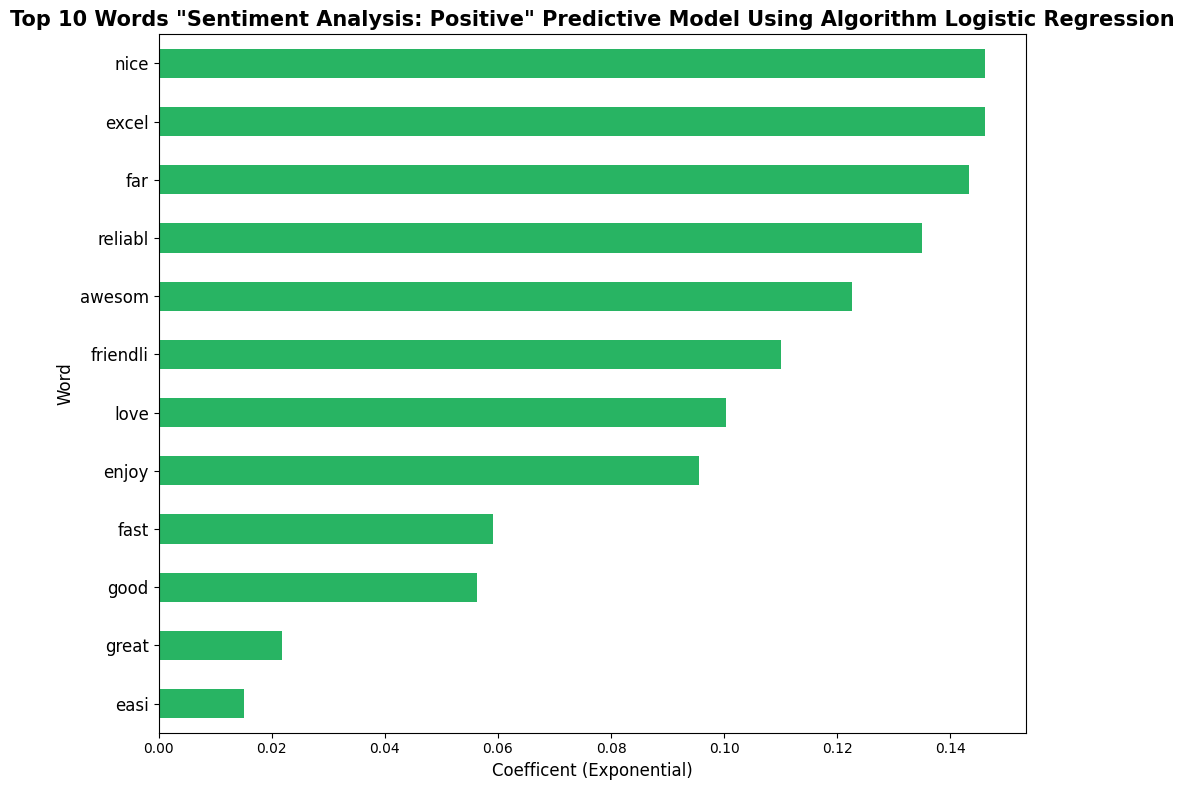

In [ ]:
pos_sent_lr.sort_values('exp_coef', ascending=True).plot(x='word', y='exp_coef', kind='barh', figsize=(10,8), legend=None, color='#28B463')
plt.title('Top 10 Words "Sentiment Analysis: Positive" Predictive Model Using Algorithm Logistic Regression', size=15, weight='bold')
plt.yticks(size=12)
plt.ylabel('Word', size=12)
plt.xlabel("Coefficent (Exponential)", size=12)
plt.tight_layout()
plt.show()

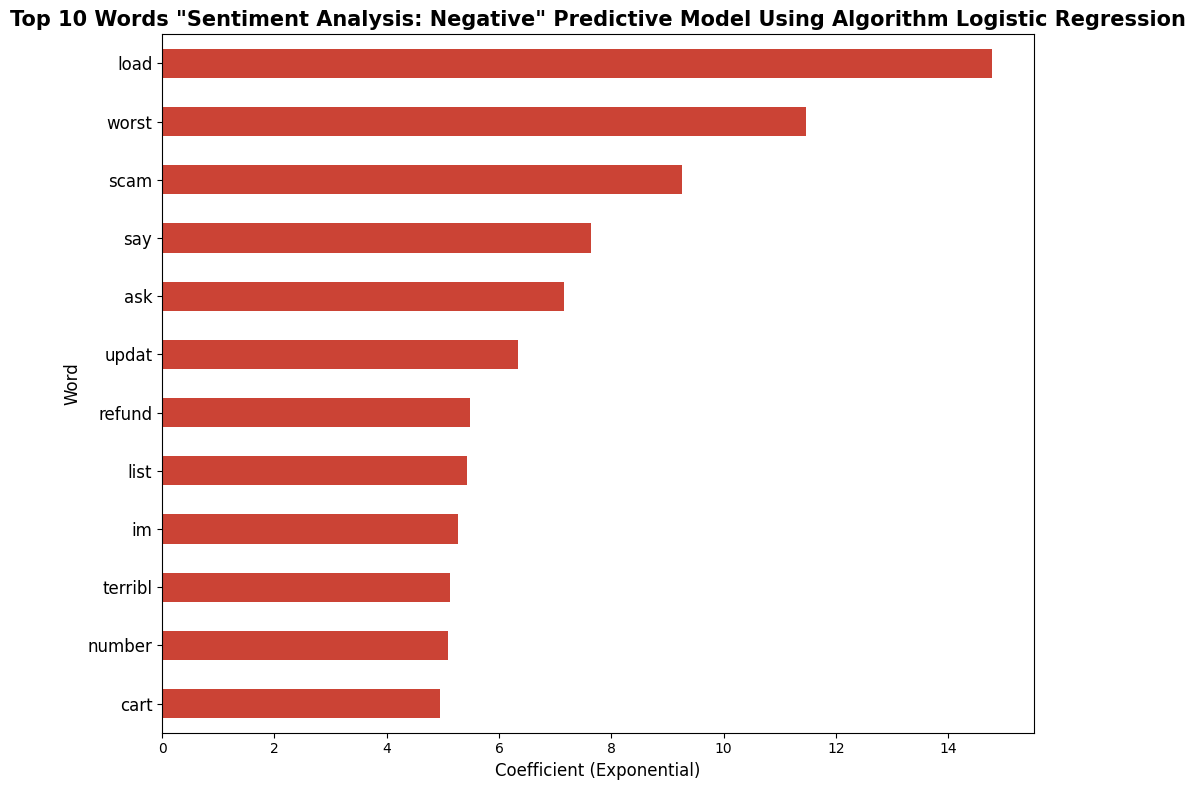

In [ ]:
neg_sent_lr.plot(x='word', y='exp_coef', kind='barh', figsize=(10,8), legend=None, color='#CB4335')
plt.title('Top 10 Words "Sentiment Analysis: Negative" Predictive Model Using Algorithm Logistic Regression', size=15, weight='bold')
plt.yticks(size=12)
plt.ylabel('Word', size=12)
plt.xlabel('Coefficient (Exponential)', size=12)
plt.tight_layout()
plt.show()

**SVC**

In [ ]:
svc_coef=pd.DataFrame(gs_tvec_svc.best_estimator_.named_steps['tvec'].get_feature_names_out(), columns=['word'])
svc_coef['coef'] = gs_tvec_svc.best_estimator_.named_steps['svc'].coef_.toarray()[0]

# top 12 kata Positif
pos_sent_svc = svc_coef.sort_values(by='coef').head(12)

# top 12 kata Negatif
neg_sent_svc = svc_coef.sort_values(by='coef').tail(12)

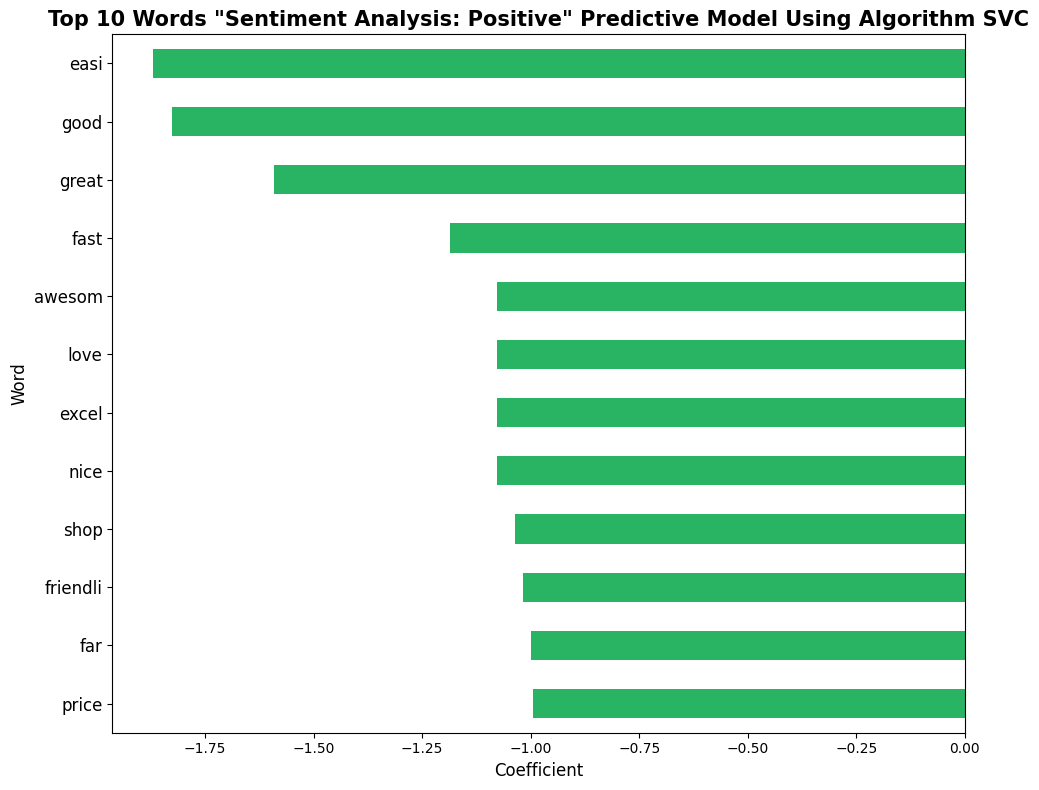

In [ ]:
pos_sent_svc.sort_values('coef', ascending=False).plot(x='word', y='coef', kind='barh', figsize=(10,8), legend=None, color='#28B463')
plt.title('Top 10 Words "Sentiment Analysis: Positive" Predictive Model Using Algorithm SVC', size=15, weight='bold')
plt.yticks(size=12)
plt.ylabel('Word', size=12)
plt.xlabel('Coefficient', size=12)
plt.tight_layout()
plt.show()

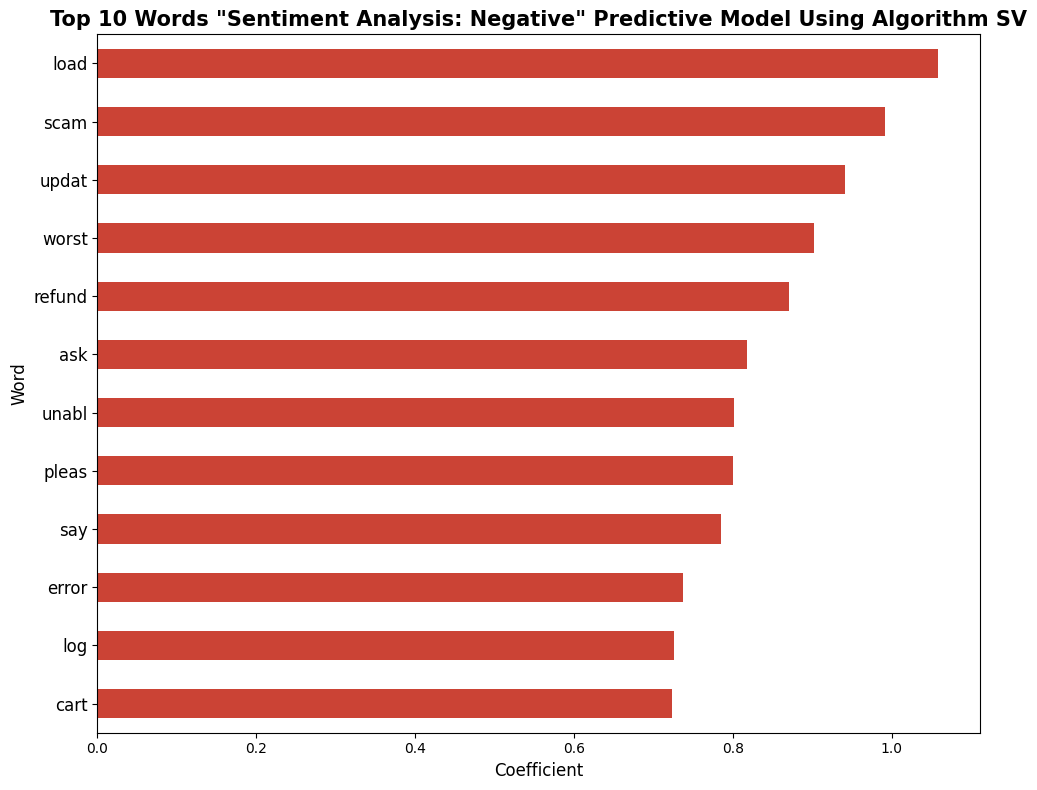

In [ ]:
neg_sent_svc.plot(x='word', y='coef', kind='barh', figsize=(10,8), legend=None, color='#CB4335')
plt.title('Top 10 Words "Sentiment Analysis: Negative" Predictive Model Using Algorithm SV', size=15, weight='bold')
plt.yticks(size=12)
plt.ylabel('Word', size=12)
plt.xlabel('Coefficient', size=12)
plt.tight_layout()
plt.show()

**Misclassified Reviews on Validation Set**

In [ ]:
val_df = df.loc[y_val.index, :]
val_df['pred'] = voting_pred # hasil model prediksi dari model validation
val_df['correctly_classified'] = (val_df['pred'] == val_df['target'])
val_df[val_df['correctly_classified'] ==0].shape

(66, 6)

In [ ]:
pd.set_option('display.max_colwidth', None)
val_df[(val_df['target']==0) & (val_df['pred']==1)][['content_stem', 'score', 'target', 'pred']]


,content_stem,score,target,pred
1497,alway crash log keep say load cannot get account updat work,4,0,1
2408,promo code,4,0,1
2467,becom one frequent wallet cri,5,0,1
1018,laggi take sec page load,4,0,1
2208,comment,5,0,1
1592,shock,4,0,1
3327,like purchas fulfil refund done time everyth track perfectli also bring back blackpink face instead discount ronaldo,5,0,1
1230,long wait open app,4,0,1
3384,friend unabl use referr code,4,0,1
1628,minim lag specif inform categori neatli organ,4,0,1


In [ ]:
val_df[(val_df['target']==1) & (val_df['pred']==0)][['content_stem', 'score', 'target', 'pred']]


,content_stem,score,target,pred
2865,much clutter interfac shop experi could much streamlin,3,1,0
1855,one increas product mask price choos ship uneth howev custom servic cant anyth,1,1,0
2381,good buy,3,1,0
2890,like trezo photo upload option limit carousel wider rang option allow photo upload dropbox make much better conveni,2,1,0
2414,get slower product get expens,3,1,0
1331,bias platform side buyer word came csr abl delet rate buyer without consent buyer henc imposs know platform reput even base rate dishonest abl remov rate buyer look good recommend unfair platform other,1,1,0
942,unfriendli user interfac,1,1,0
1346,say free ship cod store free ship cash deliveri,3,1,0
2521,although tool sell advanc howev realli gener sale realli get good deal often coupon code,2,1,0
3029,mani reason price sale encount cancel order order accept payment made give reason like undeliver area hdb singapor undeliver unbeliev anoth reason stock order accept first instanc overal still good e commerc site despit shortcom henc star rather,3,1,0


In [ ]:
def barplot_tvec(df, pred, title, color):
  word_series = df[(df['correctly_classified']==0) & (df['pred']==pred)]['content_stem']
  tvec = TfidfVectorizer(stop_words='english')
  tvec_df = pd.DataFrame(tvec.fit_transform(word_series).todense(), columns=tvec.get_feature_names_out())
  sum_words = tvec_df.sum(axis=0)
  top_words = sum_words.sort_values(ascending=False).head(12)
  top_words.sort_values(ascending=True).plot(kind='barh', figsize=(10,8), color=color)


  plt.title(title, size=15, weight='bold')
  plt.xlabel('Count', size=12)
  plt.xlim(0,5)
  plt.yticks(size=12)
  plt.tight_layout()
  plt.show()

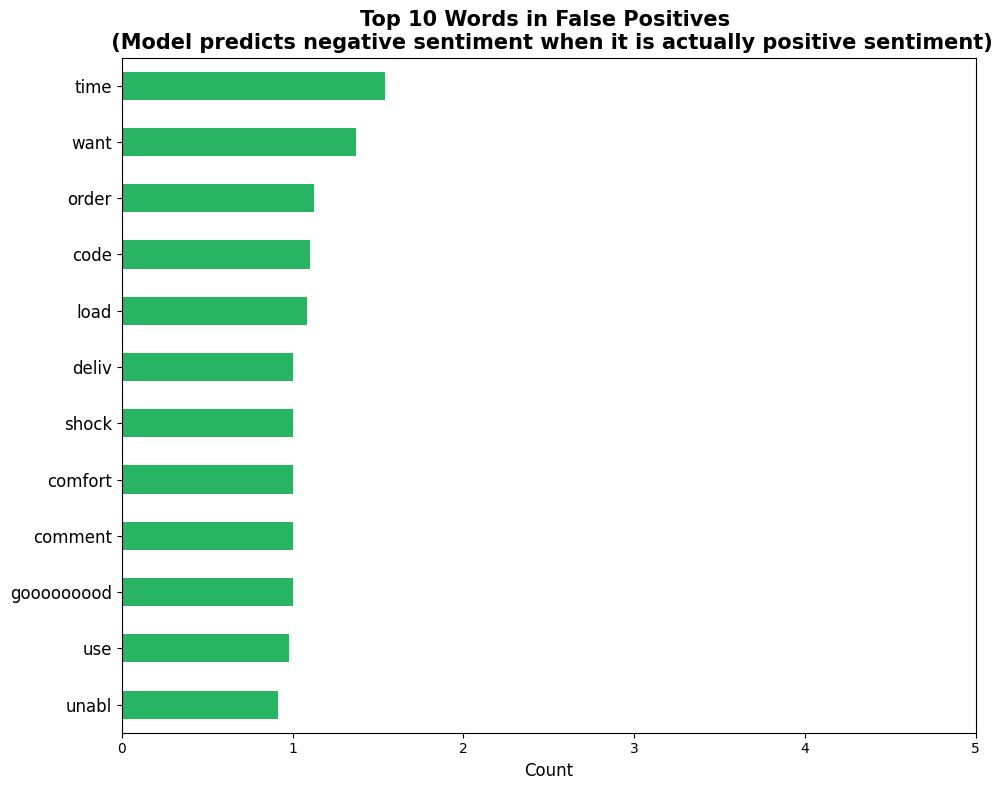

In [ ]:
barplot_tvec(df=val_df,
             pred=1,
             title='Top 10 Words in False Positives \n (Model predicts negative sentiment when it is actually positive sentiment)',
             color='#28B463')

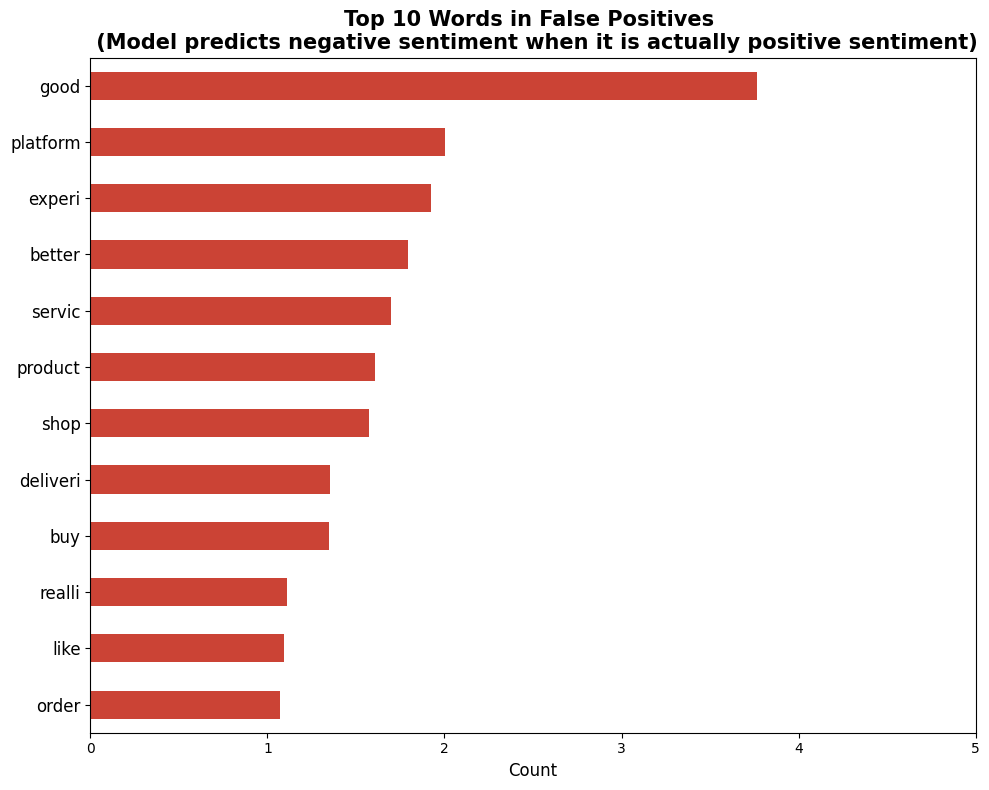

In [ ]:
barplot_tvec(df=val_df,
             pred=0,
             title='Top 10 Words in False Positives \n (Model predicts negative sentiment when it is actually positive sentiment)',
             color='#CB4335')

In [ ]:
fn = val_df[(val_df['correctly_classified']==0) & (val_df['pred']==0)][['content', 'content_stem', 'score']]
fn['count_good'] = fn['content_stem'].str.count('good')

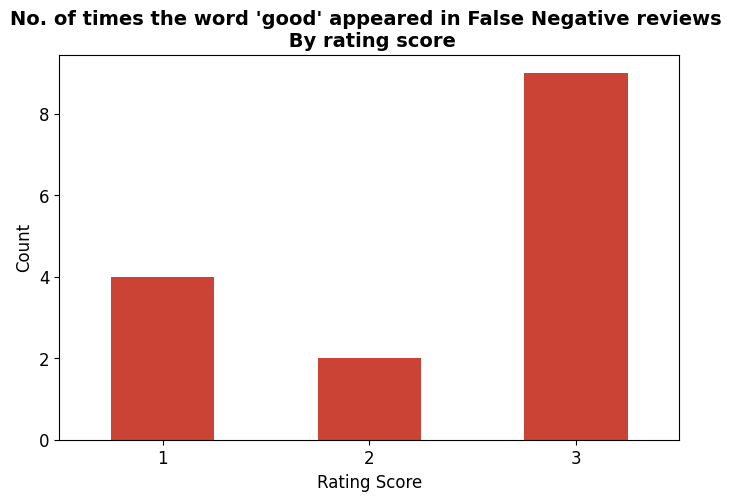

In [ ]:
plt.figure(figsize=(8,5))
fn.groupby('score')['count_good'].sum().plot(kind='bar', color='#CB4335')
plt.title("No. of times the word 'good' appeared in False Negative reviews \n By rating score", size=14, weight='bold')
plt.ylabel('Count', size=12)
plt.yticks(size=12)
plt.xlabel('Rating Score', size=12)
plt.xticks(size=12, rotation=0)
plt.show()

In [ ]:
fn[fn['count_good']>0][['content','content_stem','score']].sort_values(by='score')

,content,content_stem,score
1331,"Shopee is a biased platform whom sides sellers more than buyers. These words came from Shopee CSR themselves that Sellers are able to delete ratings from buyers without consent from buyers. Hence, it is impossible to know if sellers on the platform are reputable or not even based on the ratings as dishonest sellers are able to remove the 'bad' ratings from buyers, to 'look good'. Not recommending this unfair platform to any others!",bias platform side buyer word came csr abl delet rate buyer without consent buyer henc imposs know platform reput even base rate dishonest abl remov rate buyer look good recommend unfair platform other,1
2444,The return policy not good. Use Lazada better.,return polici good use lazada better,1
3074,Sellers can easily cancel your orders even after assuring you that your orders can be shipped. Be careful of items that have prices that are too good to be true. Can't even leave feedback to bad sellers. Won't be buying from shopee again. Stick to lazada or qoo10 better.,easili cancel order even assur order ship care price good true even leav feedback buy stick lazada qoo better,1
1650,Delivery very bad no good service. Very very bad service,deliveri good servic servic,1
2521,"Although tools for selling are advanced, however it can't really generate sales. But you can Really get good deals often from coupon codes.",although tool sell advanc howev realli gener sale realli get good deal often coupon code,2
2171,some reviews were censored. mostly faked review. others then that the price is good especially low delivery costs. buying no brand item pls be cautious.,review censor mostli fake review other price good especi low deliveri cost buy brand pl cautiou,2
2381,good to buy,good buy,3
3029,"Many items, reasonable pricing but during the 11.11 sale, i encountered cancellation of my orders by the seller after the orders were accepted and payment made, giving reasons like ""undeliverable area"". HDB in Singapore undeliverable? Unbelievable! Another reason is out of stock, but the order was accepted in the first instance! Overall still a good e-commerce site despite these shortcomings. Hence, the 3 stars rather than 5.",mani reason price sale encount cancel order order accept payment made give reason like undeliver area hdb singapor undeliver unbeliev anoth reason stock order accept first instanc overal still good e commerc site despit shortcom henc star rather,3
3330,Application is good bit I don't like the shopee agreement and policy. When I want to return the product shoppe is giving credit only to the seller and they are not considering the customer request. I hate this. So for the costly product I prefer other online portal.,applic good bit like agreement polici want return product shopp give credit consid custom request hate costli product prefer onlin portal,3
1293,Good,good,3


In [ ]:
data = df[df['target']==1]['content'].values.tolist()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['app','shopee','shoppee','shopee'])

In [ ]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB','ADV']):


  texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
  texts_out = []
  nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
  for sent in texts:
      doc = nlp(" ".join(sent))
      texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
  texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]
  return texts_out
data_ready = process_words(data)

In [ ]:
id2word = corpora.Dictionary(data_ready)
corpus = [id2word.doc2bow(text) for text in data_ready]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=3,
                                            random_state=42,
                                            update_every=1,
                                            chunksize=10,
                                            passes=10,
                                            alpha='symmetric',
                                            iterations=100,
                                            per_word_topics=True)
pprint(lda_model.print_topics())

[(0,
  '0.047*"even" + 0.034*"account" + 0.027*"update" + 0.021*"change" + '
  '0.019*"user" + 0.016*"verify" + 0.016*"also" + 0.014*"bank" + 0.012*"long" '
  '+ 0.012*"new"'),
 (1,
  '0.030*"payment" + 0.027*"use" + 0.027*"keep" + 0.018*"try" + 0.018*"time" + '
  '0.016*"page" + 0.016*"still" + 0.016*"work" + 0.014*"issue" + '
  '0.014*"purchase"'),
 (2,
  '0.039*"seller" + 0.026*"item" + 0.022*"order" + 0.020*"customer" + '
  '0.016*"send" + 0.015*"good" + 0.015*"receive" + 0.015*"get" + 0.014*"bad" + '
  '0.014*"never"')]


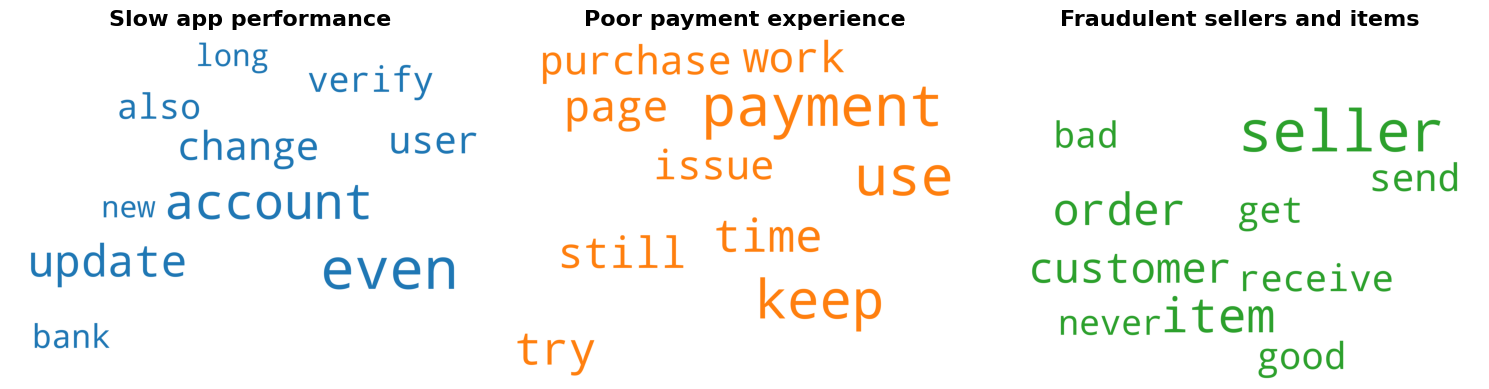

In [ ]:
# Wordcloud of Top 10 words in each topic
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(1, 3, figsize=(15,10), sharex=True, sharey=True)
topic_names = ['Slow app performance', 'Poor payment experience', 'Fraudulent sellers and items']

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(topic_names[i], weight='bold', fontdict=dict(size=16))
    plt.gca().axis('off')



plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()